<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = "Mnist_784", version = 1)
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


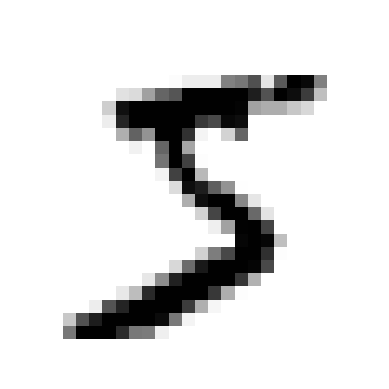

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
image_index = X.iloc[0].to_numpy()
image = image_index.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
print(y[0])

5


In [ ]:
import numpy as np
#Change y into int-preferable default
y = y.astype(np.uint8)
#Fetch training and testing set
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 60000
y_train: 60000
X_test: 10000
y_test: 10000


#Let us pick and Train a Binary Classier

In [ ]:
#We will make it simple, and only identify one digit for now, X[0]
#We define our y_train and y_test targets
y_train_target = (y_train ==5) #We are targetting to classify whether it is a 5 or not
y_test_target = (y_test == 5)


In [ ]:
#We pick a model
#SGD classifier is preprered
from sklearn.linear_model import SGDClassifier
model_1 = SGDClassifier(random_state = 42)
model_1.fit(X_train, y_train_target)

SGDClassifier(random_state=42)

In [ ]:
#Now let us make some predictions
model_1.predict([image_index])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#Performance Measures


In [ ]:
#Measuring Accuracy Using Cross-Validation
    #Let us impliment cross validation by ourselves, and not rely on what sklearn provides for us
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
#We define skfolds

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
#Let us get X_trainfolds, and y train, test folds
for train_index, test_index in skfolds.split(X_train, y_train_target):
#We get a cloned model
  cloned_model_1 = clone(model_1)
#Then, let us fetch train skfolds, and test skfolds
  X_train_folds  = X_train.iloc[train_index]
  y_train_target_folds = y_train_target.iloc[train_index]
  X_test_folds = X_train.iloc[test_index]
  y_test_target_folds = y_train_target.iloc[test_index]

  #We then make preds with our cloned model using the Kfolds
  cloned_model_1.fit(X_train_folds, y_train_target_folds)
  test_preds = cloned_model_1.predict(X_test_folds)
  #We proceed to accuracy calculation
  n_correct = sum(test_preds == y_test_target_folds)
  print(n_correct/len(test_preds))

0.9669
0.91625
0.96785


In [ ]:
#Nice. Let’s use the cross_val_score() function to evaluate your SGDClassifier model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_1, X_train, y_train_target, scoring = "accuracy", cv = 3)
scores = (scores*100)
print(scores)
#Nice Nice Nicee!!!! As we can see from the output, the model accuracy is awesome (96.035%)

[95.035 96.035 96.04 ]


In [ ]:
#Let us look at another classifer, more probably, a very dumb one
from sklearn.base import BaseEstimator
class NewClassifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)


#Nice. Let us fetch our mode
model_2 = NewClassifier()
#Let us go and evaluate its accuracy straight away
model_2_scores = cross_val_score(model_2, X_train, y_train_target, scoring = "accuracy", cv = 3)
print(model_2_scores)
#it has over 90% accuracy

[0.91125 0.90855 0.90915]


#Confusion Matrix

In [ ]:
#We first need to have test predictions. We can do this, however by not touching on our test set
#Let us use the cross_val_predict
from sklearn.model_selection import cross_val_predict
train_preds = cross_val_predict(model_1, X_train, y_train_target, cv = 3)
from sklearn.metrics import confusion_matrix
confusion_matrix_scores = confusion_matrix(y_train_target, train_preds)
print(confusion_matrix_scores)

[[53892   687]
 [ 1891  3530]]


In [ ]:
# To say, [53892 are not 5, and yes, they are classified as not 5 (True negatives)
# 687 are not 5, yet they are classified as 5. (False positives)
# 1891, they are 5s, yet the model wrongly classified them as not being 5s(false negatives).
# 3530 are indeed 5s, and the model classified them as 5s (True positives)

#Interpreting the consufion matrix

In [ ]:
""" Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
tive class): 53892 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 687 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,891 were wrongly
classified as non-5s (false negatives), while the remaining 3530 were correctly classi‐
fied as 5s (true positives).
A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right):
"""

In [ ]:
#Let us condider how a confusion matrix of a perfect preiction would be
y_train_perfect_preds = y_train_target
perfect__confusion_matrix_scores = confusion_matrix(y_train_target, y_train_perfect_preds)
print(perfect__confusion_matrix_scores )

[[54579     0]
 [    0  5421]]


#precision


In [ ]:
""" The confusion matrix gives a lot of information, but sometimes we may prefer a
more concise metric.
An interesting one to look at is the accuracy of the positive pre‐
dictions; this is called the precision of the classifier (Equation 3-1).
Equation 3-1. Precision
precision = TP/(TP + FP)"""

""" A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
 """

#Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(f"prediction_score: {precision_score(y_train_target, train_preds)}")
print(f"recall_score: {recall_score(y_train_target, train_preds)}")

prediction_score: 0.8370879772350012
recall_score: 0.6511713705958311


""" As above, When our model claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65.1% of the 5s"""

In [ ]:
"""It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if we need a simple way to compare two classifiers. The F1
 score is the harmonic mean of precision and recall  """
from sklearn.metrics import f1_score
f1_score = f1_score(y_train_target, train_preds)
print(f"f1_-score: {f1_score}")

f1_-score: 0.7325171197343846


#COPIED
"""The F1
score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other con‐
texts you really care about recall. For example, if you trained a classifier to detect vid‐
eos that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐
sifier that has a much higher recall but lets a few really bad videos show up in your
product (in such cases, you may even want to add a human pipeline to check the clas‐
sifier’s video selection). On the other hand, suppose you train a classifier to detect
shoplifters on surveillance images: it is probably fine if your classifier has only 30%
precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught) """

"""Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeo """